Decision Tree of the passangers of the titanic

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

First we have to read the info and see the information of the data set.

In [2]:
dataset = pd.read_csv('titanic.csv')


In [4]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Since there are null values in the column Age, we have to see how much could it affect the final result. If the correlation is high, we are eliminating those rows with missing values, if the correlation is low, then it is not wrong to just replace the missing values for the mean.

In [16]:
correlation = dataset['Age'].corr(dataset['Survived'])
print("Correlación entre 'Age' y 'Survived':", correlation)

Correlación entre 'Age' y 'Survived': -0.07722109457217756


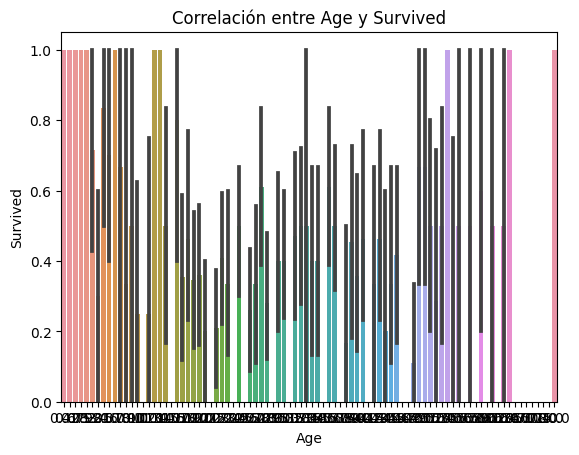

In [15]:
sns.barplot(x='Age', y='Survived', data=dataset)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlación entre Age y Survived')
plt.show()

Since the correlatión is actually low, we are replacing by the mean value.

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we have to separate the target variable (if the person survives) from the rest of independent variables (name, sex, age, etc)

In [6]:
indep_variables = dataset.drop('Survived', axis='columns')
target = dataset['Survived']
indep_variables.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now it is necessary to drop those variables that are actually not important to know if the person survives or not. For example, the name. We are not eliminating the fare cause maybe people that were able to pay more, had priority when it refer to access to boats and others evacuation ways. 

In [9]:
indep_variables.drop(['PassengerId', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Name', 'Parch'], axis = 'columns', inplace=True)
indep_variables.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


Since the model works with numerical data, we have to change the sex for a binary variable and create the deffinitive dataframe of independent variables with only numeric values. We can see male = 1 and female = 0.

In [11]:
binary_sex_number = LabelEncoder()
indep_variables['Sex_binary'] = binary_sex_number.fit_transform(indep_variables['Sex'])
indep_var_def = indep_variables.drop(['Sex'], axis = 'columns')
indep_var_def.head()

,Pclass,Age,Fare,Sex_binary
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


Finally we just have to replace the missing values of the Age for the mean value.

In [17]:
mean_age = indep_var_def['Age'].mean()
indep_var_def['Age'].fillna(mean_age, inplace=True)

We create our decision tree model.

In [18]:
model = tree.DecisionTreeClassifier()
model.fit(indep_var_def, target)

DecisionTreeClassifier()

In [19]:
model.score(indep_var_def, target)

0.9797979797979798

Here we used all the data to train the test. Now let's try the most common way of training.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(indep_var_def,target,test_size=0.2)

In [23]:
model_2 = tree.DecisionTreeClassifier()
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)

0.7318435754189944

Even when the model 1 seems to be better, because it has higher score, that score actually tells us how it is to predict known data. Model 2 calculate the score value with unknown data, therefore we should work with that one. Finally, let's start with the fun part.

In [20]:
fare_means = indep_var_def.groupby('Pclass')['Fare'].mean()
print(fare_means)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


I am 24 years old, and let's say I am travelling in the 2nd class, which mean fare is 20.66. Finally I am a male.

In [29]:
model_2.predict([[2, 24, 20.66, 1]])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

The number 0 means that I wouldn't survived in the sinking of the titanic :C